<a href="https://colab.research.google.com/github/wagner-alves-AI/datascience/blob/master/AAP2_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Etapa de análise e pré processamento dos dados

In [ ]:
import pandas as pd
import sqlalchemy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns; sns.set()
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
!pip install pymysql

You should consider upgrading via the 'c:\users\wgnr2\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
engine = sqlalchemy.create_engine('mysql+pymysql://root@localhost:3306/crimes_ny')

In [ ]:
df = pd.read_csv('c:/Users/wgnr2/Desktop/crimes.csv', delimiter=',', skipinitialspace=True)

In [ ]:
df = df.drop(columns=['CMPLNT_NUM','CMPLNT_TO_DT','CMPLNT_TO_TM','RPT_DT','RPT_DT','KY_CD',
                     'PD_CD','PD_DESC','CRM_ATPT_CPTD_CD','LAW_CAT_CD','JURIS_DESC','ADDR_PCT_CD',
                     'LOC_OF_OCCUR_DESC','PREM_TYP_DESC','PARKS_NM','HADEVELOPT','X_COORD_CD',
                     'Y_COORD_CD','Lat_Lon'])

In [ ]:
df.to_sql(
    name = 'crimes',
    con = engine,
    index = False,
    if_exists = 'append'
)
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361740 entries, 0 to 361739
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CMPLNT_FR_DT  361740 non-null  object 
 1   CMPLNT_FR_TM  361740 non-null  object 
 2   OFNS_DESC     361702 non-null  object 
 3   BORO_NM       361740 non-null  object 
 4   Latitude      355886 non-null  float64
 5   Longitude     355886 non-null  float64
dtypes: float64(2), object(4)
memory usage: 16.6+ MB


In [ ]:
# Tratar dados nulos

shape_antes = df.shape
print("antes:\t", shape_antes)

df.dropna(inplace=True)

shape_depois = df.shape
print("depois:\t", shape_depois)

antes:	 (361740, 6)
depois:	 (355848, 6)


In [ ]:
df.isnull().sum()

CMPLNT_FR_DT    0
CMPLNT_FR_TM    0
OFNS_DESC       0
BORO_NM         0
Latitude        0
Longitude       0
dtype: int64

In [ ]:
# Converter para varíaveis categóricas
df[['OFNS_DESC','BORO_NM']] = df[['OFNS_DESC','BORO_NM']].astype('category')

In [ ]:
df

,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,Latitude,Longitude
0,09/30/2016,23:25:00,DANGEROUS WEAPONS,BRONX,40.837376,-73.887761
1,09/30/2016,23:16:00,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,40.661205,-73.950687
2,09/30/2016,23:00:00,DANGEROUS DRUGS,BRONX,40.816872,-73.850685
3,09/30/2016,23:00:00,DANGEROUS WEAPONS,QUEENS,40.696177,-73.804492
4,09/30/2016,23:00:00,HARRASSMENT 2,QUEENS,40.741458,-73.884339
...,...,...,...,...,...,...
361735,01/01/2015,03:50:00,ROBBERY,MANHATTAN,40.825818,-73.948975
361736,01/01/2015,01:25:00,HARRASSMENT 2,BRONX,40.820315,-73.890825
361737,01/01/2015,00:30:00,FELONY ASSAULT,QUEENS,40.754199,-73.832963
361738,06/30/2014,12:00:00,OFF. AGNST PUB ORD SENSBLTY &,BRONX,40.883777,-73.907837


In [ ]:
# Traduzir colunas

df.columns = ['Data', 'Hora', 'Crime', 'Bairro', 'Latitude',
       'Longitude']

In [ ]:
df.columns

Index(['Data', 'Hora', 'Crime', 'Bairro', 'Latitude', 'Longitude'], dtype='object')

In [ ]:
df

,Data,Hora,Crime,Bairro,Latitude,Longitude
0,09/30/2016,23:25:00,DANGEROUS WEAPONS,BRONX,40.837376,-73.887761
1,09/30/2016,23:16:00,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,40.661205,-73.950687
2,09/30/2016,23:00:00,DANGEROUS DRUGS,BRONX,40.816872,-73.850685
3,09/30/2016,23:00:00,DANGEROUS WEAPONS,QUEENS,40.696177,-73.804492
4,09/30/2016,23:00:00,HARRASSMENT 2,QUEENS,40.741458,-73.884339
...,...,...,...,...,...,...
361735,01/01/2015,03:50:00,ROBBERY,MANHATTAN,40.825818,-73.948975
361736,01/01/2015,01:25:00,HARRASSMENT 2,BRONX,40.820315,-73.890825
361737,01/01/2015,00:30:00,FELONY ASSAULT,QUEENS,40.754199,-73.832963
361738,06/30/2014,12:00:00,OFF. AGNST PUB ORD SENSBLTY &,BRONX,40.883777,-73.907837


In [ ]:
# Criar nova base com os dados pré-processados

df.to_csv(r'C:/Users/wgnr2/Desktop/crimes2.csv', index = False, header=True)

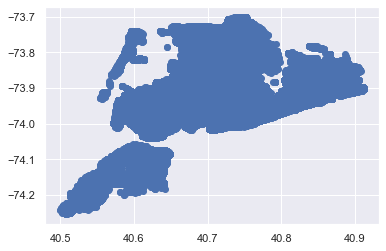

In [ ]:
# distribuição do dados

plt.plot(df['Latitude'],df['Longitude'], 'o')
plt.show()

In [ ]:
# criar tabela no BD

df.to_sql(
    name = 'base',
    con = engine,
    index = False,
    if_exists = 'append'
)
df.head()

,Data,Hora,Crime,Bairro,Latitude,Longitude
0,09/30/2016,23:25:00,DANGEROUS WEAPONS,BRONX,40.837376,-73.887761
1,09/30/2016,23:16:00,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,40.661205,-73.950687
2,09/30/2016,23:00:00,DANGEROUS DRUGS,BRONX,40.816872,-73.850685
3,09/30/2016,23:00:00,DANGEROUS WEAPONS,QUEENS,40.696177,-73.804492
4,09/30/2016,23:00:00,HARRASSMENT 2,QUEENS,40.741458,-73.884339


In [ ]:
# Separar crimes por classe
q1 = '''
select distinct crime from base
'''
crimes = pd.read_sql_query(q1,engine)
crimes

,crime
0,DANGEROUS WEAPONS
1,ASSAULT 3 & RELATED OFFENSES
2,DANGEROUS DRUGS
3,HARRASSMENT 2
4,ROBBERY
5,CRIMINAL MISCHIEF & RELATED OF
6,MISCELLANEOUS PENAL LAW
7,PETIT LARCENY
8,FELONY ASSAULT
9,OFFENSES AGAINST PUBLIC ADMINI


In [ ]:
# Agrupar total de crimes por bairro

q2 = '''select Bairro, crime 'tipo' , count(crime) as 'contagem' from base
group by bairro'''

crimes_bairro = pd.read_sql_query(q2,engine)
crimes_bairro

,Bairro,tipo,contagem
0,BRONX,DANGEROUS WEAPONS,79079
1,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,104441
2,MANHATTAN,DANGEROUS DRUGS,85734
3,QUEENS,DANGEROUS WEAPONS,70251
4,STATEN ISLAND,HARRASSMENT 2,16343


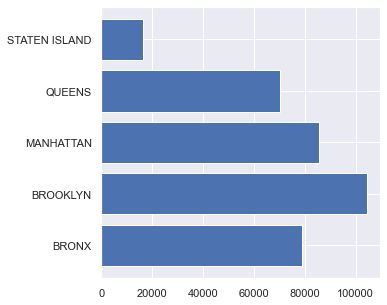

In [ ]:
# visualização

plt.rcParams['figure.figsize'] = [5,5]
plt.barh(crimes_bairro['Bairro'], crimes_bairro['contagem'])
plt.show()

### Etapa de Clusterização

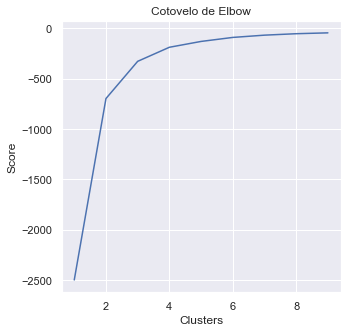

In [ ]:
# descobrir o K ideal pelo método de Elbow

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Cotovelo de Elbow')

plt.show()

In [ ]:
X = df[['Latitude','Longitude']]

In [ ]:
X

,Latitude,Longitude
0,40.837376,-73.887761
1,40.661205,-73.950687
2,40.816872,-73.850685
3,40.696177,-73.804492
4,40.741458,-73.884339
...,...,...
361735,40.825818,-73.948975
361736,40.820315,-73.890825
361737,40.754199,-73.832963
361738,40.883777,-73.907837


In [ ]:
# Avaliar silhueta

n_clusters = 6 
kmeans = KMeans(n_clusters = n_clusters, init ='k-means++')
kmeans.fit(X)

# Calcula o Silhouette_score o qual dÃ¡ uma perspectiva da densidade e separaÃ§Ã£o dos clusters
silhouette_avg = silhouette_score(X, labels)
print("\n\n For ", n_clusters,
          " clusters, the average silhouette_score is :", silhouette_avg)



 For  6  clusters, the average silhouette_score is : 0.4370838944582807


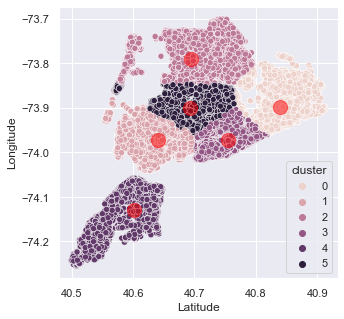

In [ ]:
# Treinamento do modelo e visualização dos resultados

kmeans = KMeans(n_clusters = 6, init ='k-means++')
    
kmeans.fit(df[['Latitude','Longitude']]) 

df['cluster'] = kmeans.fit_predict(df[['Latitude','Longitude']])

centroides = kmeans.cluster_centers_ 
    
labels = kmeans.predict(df[['Latitude','Longitude']])

# Clusterização
sns.scatterplot(x=df['Latitude'], y=df['Longitude'], hue=df['cluster'])
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)
plt.show()

## Resultados

In [ ]:
# Data frame final, com a coluna de rótulos (cluster)

df.head()

,Data,Hora,Crime,Bairro,Latitude,Longitude,cluster
0,09/30/2016,23:25:00,DANGEROUS WEAPONS,BRONX,40.837376,-73.887761,0
1,09/30/2016,23:16:00,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,40.661205,-73.950687,1
2,09/30/2016,23:00:00,DANGEROUS DRUGS,BRONX,40.816872,-73.850685,0
3,09/30/2016,23:00:00,DANGEROUS WEAPONS,QUEENS,40.696177,-73.804492,2
4,09/30/2016,23:00:00,HARRASSMENT 2,QUEENS,40.741458,-73.884339,5


          Bairro          Crime  Total
0          BRONX  PETIT LARCENY  11364
1       BROOKLYN  PETIT LARCENY  17034
2      MANHATTAN  PETIT LARCENY  18560
3         QUEENS  PETIT LARCENY  11413
4  STATEN ISLAND  PETIT LARCENY   2505


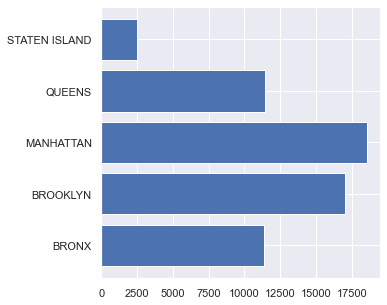

In [ ]:
q3 = '''
select Bairro,Crime, count(*) Total from base where
crime like '%Petit%'
group by Bairro
'''

tot_larceny = pd.read_sql_query(q3,engine)
print(tot_larceny)
plt.rcParams['figure.figsize'] = [5,5]
plt.barh(tot_larceny['Bairro'], tot_larceny['Total'])
plt.show()

          Bairro          Crime  Total
0          BRONX  HARRASSMENT 2  11201
1       BROOKLYN  HARRASSMENT 2  15190
2      MANHATTAN  HARRASSMENT 2  10011
3         QUEENS  HARRASSMENT 2  10259
4  STATEN ISLAND  HARRASSMENT 2   3244


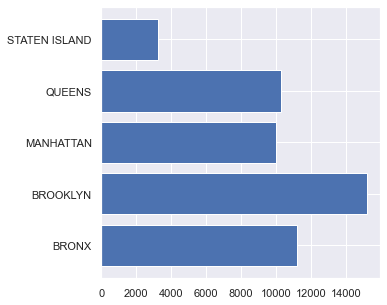

In [ ]:
q4 = '''
select Bairro,Crime, count(*) Total from base where
crime like '%Harrassment%'
group by Bairro;
'''

tot_harr = pd.read_sql_query(q4,engine)
print(tot_harr)
plt.rcParams['figure.figsize'] = [5,5]
plt.barh(tot_harr['Bairro'], tot_harr['Total'])
plt.show()

    Latitude  Longitude
0  40.839822 -73.897234
1  40.640945 -73.971330
2  40.694120 -73.790509
3  40.754121 -73.972979
4  40.602033 -74.128620
5  40.693308 -73.901249


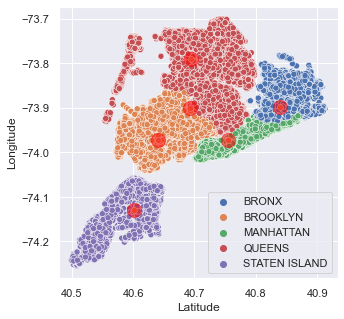

In [ ]:
delegacias = pd.DataFrame(centroides,columns = ['Latitude','Longitude'])
print(delegacias)

sns.scatterplot(x=df['Latitude'], y=df['Longitude'], hue=df['Bairro'])
sns.scatterplot(x=delegacias['Latitude'], y=delegacias['Longitude'])
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)
plt.show()

### Conclusões do projeto

Inicialmente na etapa de clusterização, eu havia optado por 4 clustes , porém com 6 o resultado do teste de silhuta se mostrou melhor no agrupamento com os dados totais da amostra, pois assim seria possível prever duas delegacias especializadas em assédio "Harrasment" , considerando o volume de crimes dessa natureza.

a) Qual o maior núcleo de pequenos assaltos (PETIT LARCENY)? Quais bairros estão envolvidos? 


MANHATAN concentra o maior número de pequenos assaltos
Bairros envolvido: Bronx Brooklyn, Queens, Staten Island


b) Aonde devem ser localizadas delegacias especializadas em crimes de assédio HARRASSMENT?

Nos seguintes Bairros: Queens, Manhatan, Brooklyn e Bronx



c) Considerando todos os crimes, o prefeito deseja saber quantas novas delegacias precisam ser abertas e a exata localização?

Nas seguintes coordenadas:

C|| Latitude || Longitude

0  40.839822 -73.897234||

1  40.640945 -73.971330||

2  40.694120 -73.790509||

3  40.754121 -73.972979||

4  40.602033 -74.128620||

5  40.693308 -73.901249||